<a href="https://colab.research.google.com/github/Solomon-Gebrehiwot/ml_mdls/blob/main/K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

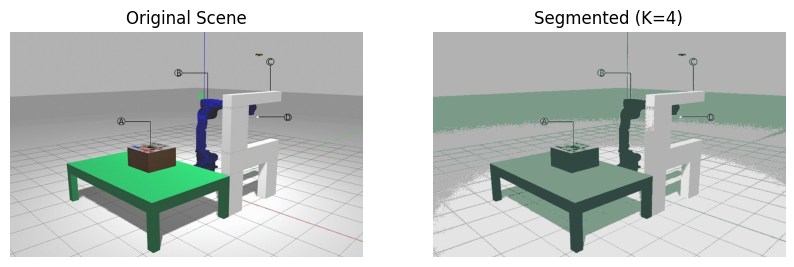

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image

# Load robot scene image
img = Image.open("/content/View-of-HP20D-robot-B-its-workspace-A-C-and-the-image-sensor-in-ROS-simulator-D.png")
img_np = np.array(img)
w, h, d = img_np.shape
pixels = img_np.reshape((-1, 3))

# Apply K-Means to segment the scene
k = 4  # e.g., 4 segments: table, object, floor, background
kmeans = KMeans(n_clusters=k, random_state=42).fit(pixels)
segmented_pixels = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_pixels.reshape((w, h, 3)).astype('uint8')

# Show results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Scene")
plt.imshow(img_np)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Segmented (K={k})")
plt.imshow(segmented_img)
plt.axis('off')
plt.show()


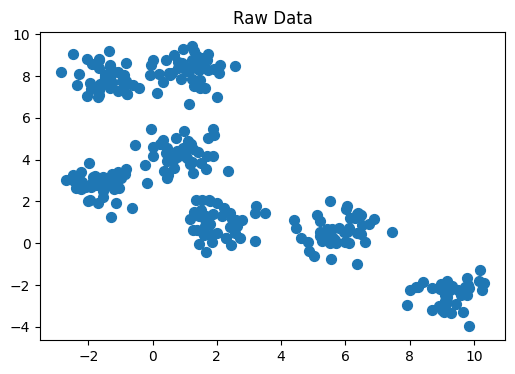

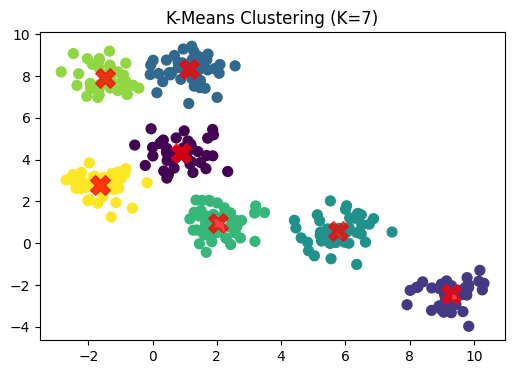

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data
X, y_true = make_blobs(n_samples=300, centers=7, cluster_std=0.60, random_state=0)

# Plot raw data
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Raw Data")
plt.show()

# Apply K-Means
k = 7
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot clustered data
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f"K-Means Clustering (K={k})")
plt.show()
